In [34]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")


In [35]:
df = pd.read_csv(r'C:\Users\SHRUTI\Desktop\MHDD\data\Mental health Depression disorder Data.csv')
df = pd.DataFrame(df, columns=df.columns)
df = df.drop("index",axis=1)
df

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
...,...,...,...,...,...,...,...,...,...,...
108548,Zimbabwe,ZWE,2013,303564.60359,NaN,NaN,NaN,NaN,NaN,NaN
108549,Zimbabwe,ZWE,2014,311665.769283,NaN,NaN,NaN,NaN,NaN,NaN
108550,Zimbabwe,ZWE,2015,320638.507158,NaN,NaN,NaN,NaN,NaN,NaN
108551,Zimbabwe,ZWE,2016,330437.353798,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# i analyze the first table of the dataset cuz it is more valuable to our question 
df_1 = df.iloc[0:6468, :]

In [37]:
type(df_1)

pandas.core.frame.DataFrame

In [38]:
# drop extra columns
df_1.drop(columns=['Code'], inplace=True)

In [39]:
# rename the columns
map_names = {'Entity': 'country',
             'Year' : 'year',
             'Schizophrenia (%)':'schizo', 
             'Bipolar disorder (%)':'bipolar',
             'Eating disorders (%)' : 'eating_dis',
             'Anxiety disorders (%)' : 'anxiety',
             'Drug use disorders (%)':'drug',
             'Depression (%)':'depres',
             'Alcohol use disorders (%)':'alcohol'}


In [40]:
df_1.rename(columns=map_names,inplace=True)


In [41]:
# change the type of columns so that we could analyze better
df_1['year'] = df_1['year'].astype(int)
df_1['schizo'] = df_1['schizo'].astype(float)
df_1['bipolar'] = df_1['bipolar'].astype(float)
df_1['eating_dis'] = df_1['eating_dis'].astype(float)
df_1['anxiety'] = df_1['anxiety'].astype(float)
df_1['drug'] = df_1['drug'].astype(float)
df_1['depres'] = df_1['depres'].astype(float)
df_1['alcohol'] = df_1['alcohol'].astype(float)

In [42]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     6468 non-null   object 
 1   year        6468 non-null   int32  
 2   schizo      6468 non-null   float64
 3   bipolar     6468 non-null   float64
 4   eating_dis  6468 non-null   float64
 5   anxiety     6468 non-null   float64
 6   drug        6468 non-null   float64
 7   depres      6468 non-null   float64
 8   alcohol     6468 non-null   float64
dtypes: float64(7), int32(1), object(1)
memory usage: 429.6+ KB


In [43]:
# create table of continents according to year 2017
cont_1 = ['cont',
          'country',
          'schizo',
          'bipolar',
          'eating_dis',
          'anxiety',
          'drug', 
          'depres',
          'alcohol']
cont_2017 = pd.DataFrame(columns = cont_1)
cont_2017

,cont,country,schizo,bipolar,eating_dis,anxiety,drug,depres,alcohol


In [44]:
# group countries into continents and put them in cont
## create a list of asian countries 
country_asia = ['China','India',
               'Indonesia','Pakistan',
               'Bangladesh','Japan',
               'Philippines','Vietnam',
               'Turkey','Iran',
               'Thailand','Myanmar',
               'South Korea','Iraq',
               'Afghanistan','Saudi Arabia',
               'Uzbekistan','Malaysia',
               'Yemen','Nepal',
               'North Korea','Sri Lanka',
               'Kazakhstan','Syria',
               'Cambodia','Jordan',
               'Azerbaijan','United Arab Emirates',
               'Tajikistan','Israel',
               'Laos','Lebanon',
               'Kyrgyzstan','Turkmenistan',
               'Singapore','Oman',
               'Kuwait','Georgia',
               'Mongolia','Armenia',
               'Qatar','Bahrain',
               'Cyprus','Bhutan']

In [45]:
# select a dataframe for year 2017 
df_2017 = df_1.loc[df_1.year==2017]

In [46]:
df_2017

,country,year,schizo,bipolar,eating_dis,anxiety,drug,depres,alcohol
27,Afghanistan,2017,0.166158,0.708089,0.107142,4.882481,2.473934,4.136347,0.661217
55,Albania,2017,0.201025,0.704480,0.174046,3.385245,0.517614,2.208414,1.837955
83,Algeria,2017,0.197913,0.818687,0.213612,5.065876,1.717218,3.661094,0.665191
111,American Samoa,2017,0.248557,0.468305,0.177808,3.315834,0.772801,2.939668,1.142277
139,Andean Latin America,2017,0.201471,0.881737,0.355475,4.267738,0.661481,2.610385,1.533573
...,...,...,...,...,...,...,...,...,...
6355,Western Sub-Saharan Africa,2017,0.175340,0.637776,0.142431,2.908183,0.488562,3.699654,0.968598
6383,World,2017,0.254055,0.598083,0.211304,3.764811,0.941628,3.441087,1.396497
6411,Yemen,2017,0.171691,0.735682,0.132623,4.857207,1.414725,4.012346,0.634413
6439,Zambia,2017,0.165866,0.605972,0.142768,3.599714,0.515972,3.641811,1.633243


In [47]:
## take the mean of diseases for Asian countries
mean_asia = {}
for row in range(len(df_2017)):
    country = df_2017.iloc[row]['country']
    if country in country_asia:
        if 'Asia' not in mean_asia:
            mean_asia['Asia'] = {'schizo': [], 'bipolar': [], 'eating_dis': [], 'anxiety': [], 'drug': [], 'depres': [], 'alcohol': []}
            mean_asia['Asia']['schizo'].append(df_2017.iloc[row]['schizo'])
            mean_asia['Asia']['bipolar'].append(df_2017.iloc[row]['bipolar'])
            mean_asia['Asia']['eating_dis'].append(df_2017.iloc[row]['eating_dis'])
            mean_asia['Asia']['anxiety'].append(df_2017.iloc[row]['anxiety'])
            mean_asia['Asia']['drug'].append(df_2017.iloc[row]['drug'])
            mean_asia['Asia']['depres'].append(df_2017.iloc[row]['depres'])
            mean_asia['Asia']['alcohol'].append(df_2017.iloc[row]['alcohol'])

if 'Asia' in mean_asia:
    asia_mean = {'cont': 'Asia',
                 'country':'Asian countries',
                 'schizo': np.mean(mean_asia['Asia']['schizo']),
                 'bipolar': np.mean(mean_asia['Asia']['bipolar']),
                 'eating_dis': np.mean(mean_asia['Asia']['eating_dis']),
                 'anxiety': np.mean(mean_asia['Asia']['anxiety']),
                 'drug': np.mean(mean_asia['Asia']['drug']),
                 'depres': np.mean(mean_asia['Asia']['depres']),
                 'alcohol': np.mean(mean_asia['Asia']['alcohol'])}
    print(asia_mean) 
    
    cont_2017 =  pd.concat([cont_2017,pd.DataFrame(asia_mean, index=range(1))])

{'cont': 'Asia', 'country': 'Asian countries', 'schizo': 0.166158, 'bipolar': 0.708089, 'eating_dis': 0.107142, 'anxiety': 4.882481, 'drug': 2.473934, 'depres': 4.136347, 'alcohol': 0.661217}


In [48]:
cont_2017

,cont,country,schizo,bipolar,eating_dis,anxiety,drug,depres,alcohol
0,Asia,Asian countries,0.166158,0.708089,0.107142,4.882481,2.473934,4.136347,0.661217


In [49]:
## create list of countries for europe 
country_europe = ['Albania','Andorra',
                 'Austria','Belarus',
                 'Belgium','Bulgaria',
                 'Crotia','Cyprus',
                 'Czech Republic','Denmark',
                 'Estonia','Finland',
                 'France','Germany',
                 'Greece','Hungary',
                 'Iceland','Ireland',
                 'Italy','Kosovo',
                 'Latvia','Liechtenstein',
                 'Lithuania','Luxembourg',
                 'Malta','Moldova',
                 'Monaco','Montenegro',
                 'Netherlands','North Macedonia',
                 'Norway','Norway',
                 'Poland','Portugal',
                 'Romania','Russia',
                 'San Marino','Serbia',
                 'Slovakia','Slovenia',
                 'Spain','Sweden',
                 'Switzerland','Ukraine',
                 'United Kingdom','Vatican']

In [50]:
### integrate european countries as europe with their disease
mean_europe = {}
for row in range(len(df_2017)):
    country = df_2017.iloc[row]['country']
    if country in country_europe:
        if 'Europe' not in mean_europe:
            mean_europe['Europe'] = {'schizo': [], 'bipolar': [], 'eating_dis': [], 'anxiety': [], 'drug': [], 'depres': [], 'alcohol': []}
            mean_europe['Europe']['schizo'].append(df_2017.iloc[row]['schizo'])
            mean_europe['Europe']['bipolar'].append(df_2017.iloc[row]['bipolar'])
            mean_europe['Europe']['eating_dis'].append(df_2017.iloc[row]['eating_dis'])
            mean_europe['Europe']['anxiety'].append(df_2017.iloc[row]['anxiety'])
            mean_europe['Europe']['drug'].append(df_2017.iloc[row]['drug'])
            mean_europe['Europe']['depres'].append(df_2017.iloc[row]['depres'])
            mean_europe['Europe']['alcohol'].append(df_2017.iloc[row]['alcohol'])
if 'Europe' in mean_europe:
    europe_miangin = {'cont':'Europe',
                      'country':'European countries',
                     'schizo': np.mean(mean_europe['Europe']['schizo']),
                     'bipolar' : np.mean(mean_europe['Europe']['bipolar']),
                     'eating_dis': np.mean(mean_europe['Europe']['eating_dis']),
                     'anxiety': np.mean(mean_europe['Europe']['anxiety']),
                     'drug' : np.mean(mean_europe['Europe']['drug']),
                     'depres' : np.mean(mean_europe['Europe']['depres']),
                     'alcohol' : np.mean(mean_europe['Europe']['alcohol'])}
    print(europe_miangin)
    cont_2017 =  pd.concat([cont_2017,pd.DataFrame(europe_miangin, index=range(1))], axis=0)
cont_2017    

{'cont': 'Europe', 'country': 'European countries', 'schizo': 0.201025, 'bipolar': 0.70448, 'eating_dis': 0.174046, 'anxiety': 3.385245, 'drug': 0.517614, 'depres': 2.208414, 'alcohol': 1.837955}


,cont,country,schizo,bipolar,eating_dis,anxiety,drug,depres,alcohol
0,Asia,Asian countries,0.166158,0.708089,0.107142,4.882481,2.473934,4.136347,0.661217
0,Europe,European countries,0.201025,0.704480,0.174046,3.385245,0.517614,2.208414,1.837955


In [51]:
## create a list of african countries 
country_africa = ['Nigeria','Ethiopia',
                 'Egypt','DR Congo',
                 'Tanzania','South Africa',
                 'Kenya','Uganda',
                 'Algeria','Sudan',
                 'Morocco','Angola',
                 'Mozambique','Ghana',
                 'Madagascar','Cameroon',
                 'Côte d Ivoire','Niger',
                 'Burkina Faso','Mali',
                 'Malawi','Zambia',
                 'Senegal','Chad',
                 'Somalia','Zimbabwe',
                 'Guinea','Rwanda',
                 'Benin','Burundi',
                 'Tunisia','South Sudan',
                 'Togo','Sierra Leone',
                 'Libya','Congo',
                 'Liberia','Central African Republic',
                 'Mauritania','Eritrea',
                 'Namibia','Gambia',
                 'Botswana','Gabon',
                 'Lesotho','Guinea-Bissau',
                 'Equatorial Guinea','Mauritius',
                 'Eswatini','Djibouti',
                 'Comoros','Cabo Verde']

In [52]:
### integrate african countries as africa
mean_africa = {}
for row in range(len(df_2017)):
    country = df_2017.iloc[row]['country']
    if country in country_africa:
        if 'Africa' not in mean_europe:
            mean_africa['Africa'] = {'schizo': [], 'bipolar': [], 'eating_dis': [], 'anxiety': [], 'drug': [], 'depres': [], 'alcohol': []}
            mean_africa['Africa']['schizo'].append(df_2017.iloc[row]['schizo'])
            mean_africa['Africa']['bipolar'].append(df_2017.iloc[row]['bipolar'])
            mean_africa['Africa']['eating_dis'].append(df_2017.iloc[row]['eating_dis'])
            mean_africa['Africa']['anxiety'].append(df_2017.iloc[row]['anxiety'])
            mean_africa['Africa']['drug'].append(df_2017.iloc[row]['drug'])
            mean_africa['Africa']['depres'].append(df_2017.iloc[row]['depres'])
            mean_africa['Africa']['alcohol'].append(df_2017.iloc[row]['alcohol'])
if 'Africa' in mean_africa:
    africa_miangin = {'cont' : 'Africa',
                      'country':'African countries',
                     'schizo': np.mean(mean_africa['Africa']['schizo']),
                     'bipolar' : np.mean(mean_africa['Africa']['bipolar']),
                     'eating_dis': np.mean(mean_africa['Africa']['eating_dis']),
                     'anxiety': np.mean(mean_africa['Africa']['anxiety']),
                     'drug' : np.mean(mean_africa['Africa']['drug']),
                     'depres' : np.mean(mean_africa['Africa']['depres']),
                     'alcohol' : np.mean(mean_africa['Africa']['alcohol'])}
    print(africa_miangin)
    
    cont_2017 = pd.concat([cont_2017,pd.DataFrame(africa_miangin, index=range(1))], axis=0)
cont_2017

{'cont': 'Africa', 'country': 'African countries', 'schizo': 0.157963, 'bipolar': 0.611242, 'eating_dis': 0.124443, 'anxiety': 3.110926, 'drug': 0.772648, 'depres': 3.192789, 'alcohol': 1.510943}


,cont,country,schizo,bipolar,eating_dis,anxiety,drug,depres,alcohol
0,Asia,Asian countries,0.166158,0.708089,0.107142,4.882481,2.473934,4.136347,0.661217
0,Europe,European countries,0.201025,0.704480,0.174046,3.385245,0.517614,2.208414,1.837955
0,Africa,African countries,0.157963,0.611242,0.124443,3.110926,0.772648,3.192789,1.510943


In [53]:
## create list of American countries 
country_america = ['United States','Brazil',
                  'Mexico','Colombia',
                  'Argentina','Canada',
                  'Peru','Venezuela',
                  'Chile','Ecuador',
                  'Guatemala','Bolivia',
                  'Haiti','Dominican Republic',
                  'Cuba','Honduras',
                  'Nicaragua','Paraguay',
                  'El Salvador','Costa Rica',
                  'Panama','Uruguay']

In [54]:
mean_america = {}
for row in range(len(df_2017)):
    country = df_2017.iloc[row]['country']
    if country in country_america: 
        if 'America' not in mean_america:
            mean_america['America'] = {'schizo': [], 'bipolar': [], 'eating_dis': [], 'anxiety': [], 'drug': [], 'depres': [], 'alcohol': []}
            mean_america['America']['schizo'].append(df_2017.iloc[row]['schizo'])
            mean_america['America']['bipolar'].append(df_2017.iloc[row]['bipolar'])
            mean_america['America']['eating_dis'].append(df_2017.iloc[row]['eating_dis'])
            mean_america['America']['anxiety'].append(df_2017.iloc[row]['anxiety'])
            mean_america['America']['drug'].append(df_2017.iloc[row]['drug'])
            mean_america['America']['depres'].append(df_2017.iloc[row]['depres'])
            mean_america['America']['alcohol'].append(df_2017.iloc[row]['alcohol'])
if 'America' in mean_america:
    america_miangin = {'cont':'America',
                       'country':'American countries',
                      'schizo': np.mean(mean_america['America']['schizo']),
                      'bipolar' : np.mean(mean_america['America']['bipolar']),
                      'eating_dis': np.mean(mean_america['America']['eating_dis']),
                      'anxiety': np.mean(mean_america['America']['anxiety']),
                      'drug' : np.mean(mean_america['America']['drug']),
                      'depres' : np.mean(mean_america['America']['depres']),
                      'alcohol' : np.mean(mean_america['America']['alcohol'])}
    print(america_miangin)
    cont_2017 = pd.concat([cont_2017,pd.DataFrame(america_miangin, index=range(1))], axis=0)
cont_2017

{'cont': 'America', 'country': 'American countries', 'schizo': 0.198094, 'bipolar': 0.773376, 'eating_dis': 0.404033, 'anxiety': 6.283678, 'drug': 1.008901, 'depres': 3.665488, 'alcohol': 1.824515}


,cont,country,schizo,bipolar,eating_dis,anxiety,drug,depres,alcohol
0,Asia,Asian countries,0.166158,0.708089,0.107142,4.882481,2.473934,4.136347,0.661217
0,Europe,European countries,0.201025,0.704480,0.174046,3.385245,0.517614,2.208414,1.837955
0,Africa,African countries,0.157963,0.611242,0.124443,3.110926,0.772648,3.192789,1.510943
0,America,American countries,0.198094,0.773376,0.404033,6.283678,1.008901,3.665488,1.824515


In [55]:
## create list of countries in Oceania
country_oceania = ['Australia',
                  'New Zealand',
                  'Papua New Guinea',
                  'Fiji',
                   'Solomon Islands']


In [56]:
### integrate oceania countries 
mean_oceania = {}
for row in range(len(df_2017)):
    country = df_2017.iloc[row]['country']
    if country in country_oceania: 
        if 'Oceania' not in mean_oceania:
            mean_oceania['Oceania'] = {'schizo': [], 'bipolar': [], 'eating_dis': [], 'anxiety': [], 'drug': [], 'depres': [], 'alcohol': []}
            mean_oceania['Oceania']['schizo'].append(df_2017.iloc[row]['schizo'])
            mean_oceania['Oceania']['bipolar'].append(df_2017.iloc[row]['bipolar'])
            mean_oceania['Oceania']['eating_dis'].append(df_2017.iloc[row]['eating_dis'])
            mean_oceania['Oceania']['anxiety'].append(df_2017.iloc[row]['anxiety'])
            mean_oceania['Oceania']['drug'].append(df_2017.iloc[row]['drug'])
            mean_oceania['Oceania']['depres'].append(df_2017.iloc[row]['depres'])
            mean_oceania['Oceania']['alcohol'].append(df_2017.iloc[row]['alcohol'])
if 'Oceania' in mean_oceania:
    oceania_miangin = {'cont':'Oceania',
                       'country':'Oceania',
                      'schizo': np.mean(mean_oceania['Oceania']['schizo']),
                      'bipolar' : np.mean(mean_oceania['Oceania']['bipolar']),
                      'eating_dis': np.mean(mean_oceania['Oceania']['eating_dis']),
                      'anxiety': np.mean(mean_oceania['Oceania']['anxiety']),
                      'drug' : np.mean(mean_oceania['Oceania']['drug']),
                      'depres' : np.mean(mean_oceania['Oceania']['depres']),
                      'alcohol' : np.mean(mean_oceania['Oceania']['alcohol'])}
    print(oceania_miangin)
    cont_2017 = pd.concat([cont_2017,pd.DataFrame(oceania_miangin, index=range(1))], axis=0)
cont_2017

{'cont': 'Oceania', 'country': 'Oceania', 'schizo': 0.363326, 'bipolar': 1.142097, 'eating_dis': 0.943081, 'anxiety': 6.584301, 'drug': 2.315142, 'depres': 4.623881, 'alcohol': 1.511935}


,cont,country,schizo,bipolar,eating_dis,anxiety,drug,depres,alcohol
0,Asia,Asian countries,0.166158,0.708089,0.107142,4.882481,2.473934,4.136347,0.661217
0,Europe,European countries,0.201025,0.704480,0.174046,3.385245,0.517614,2.208414,1.837955
0,Africa,African countries,0.157963,0.611242,0.124443,3.110926,0.772648,3.192789,1.510943
0,America,American countries,0.198094,0.773376,0.404033,6.283678,1.008901,3.665488,1.824515
0,Oceania,Oceania,0.363326,1.142097,0.943081,6.584301,2.315142,4.623881,1.511935


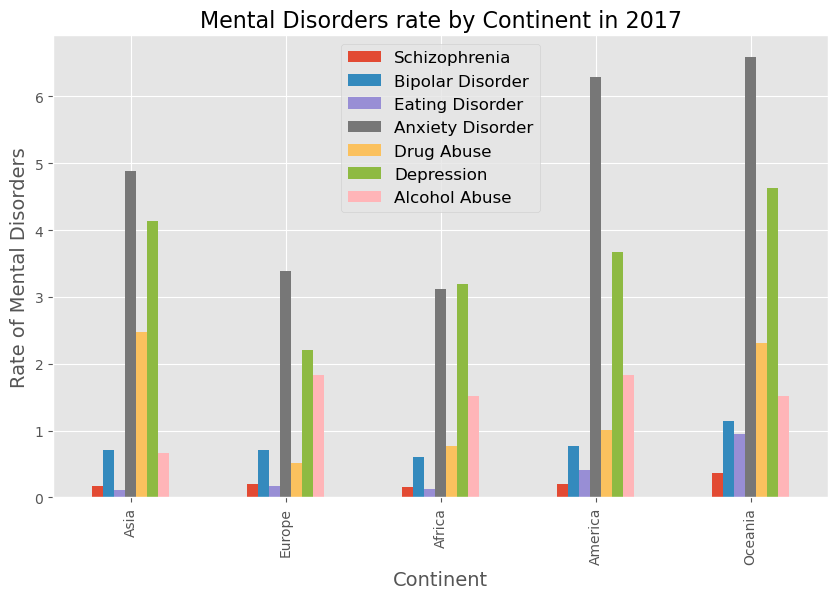

In [57]:
# plot cont_2017
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10,6))
cont_2017.set_index('cont').plot(kind='bar', ax=ax)
ax.set_xlabel('Continent', fontsize=14)
ax.set_ylabel('Rate of Mental Disorders', fontsize=14)
ax.set_title('Mental Disorders rate by Continent in 2017', fontsize=16)
ax.legend(['Schizophrenia', 'Bipolar Disorder', 'Eating Disorder','Anxiety Disorder','Drug Abuse', 'Depression','Alcohol Abuse'], fontsize=12)
plt.show()


In [58]:
Data1 = pd.read_csv(r"C:\Users\SHRUTI\Desktop\MHDD\data\1- mental-illnesses-prevalence.csv")
Data2 = pd.read_csv(r"C:\Users\SHRUTI\Desktop\MHDD\data\4- adult-population-covered-in-primary-data-on-the-prevalence-of-mental-illnesses.csv")
Data3 = pd.read_csv(r"C:\Users\SHRUTI\Desktop\MHDD\data\6- depressive-symptoms-across-us-population.csv")
Data4 = pd.read_csv(r"C:\Users\SHRUTI\Desktop\MHDD\data\7- number-of-countries-with-primary-data-on-prevalence-of-mental-illnesses-in-the-global-burden-of-disease-study.csv")

In [59]:
df1 = pd.DataFrame(Data1)
df2 = pd.DataFrame(Data2)
df3 = pd.DataFrame(Data3)
df4 = pd.DataFrame(Data4)

In [68]:
df2.sort_values(by= "Major depression" ,inplace=True)
plt.figure(dpi=200)
fig = px.bar(df2,x="Major depression", y="Entity", orientation='h',color='Bipolar disorder')
fig.show()

<Figure size 1280x960 with 0 Axes>

In [61]:
df2.sort_values(by= "Eating disorders" ,inplace=True)
plt.figure(dpi=200)
fig = px.bar(df2, x="Eating disorders", y="Entity", orientation='h',color='Dysthymia')
fig.show()

<Figure size 1280x960 with 0 Axes>

In [62]:
df2.replace(to_replace="<0.1", value=0.1, regex=True, inplace=True)

In [63]:
df2['Schizophrenia'] = df2['Schizophrenia'].astype(float)

In [64]:
df2.sort_values(by= "Schizophrenia" ,inplace=True)
plt.figure(dpi=200)
fig = px.bar(df2, x="Schizophrenia", y="Entity", orientation='h',color='Anxiety disorders')
fig.show()

<Figure size 1280x960 with 0 Axes>

In [65]:
x = ["Appetite change", "Average across symptoms", "Depressed mood", "Difficulty concentrating", "Loss of interest",
    "Low energy", "Low self-esteem", "Psychomotor agitation", "Psychomotor agitation", "Sleep problems", "Suicidal ideation"]

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=x, y=df3["Nearly every day"], name='Nearly every day',
                         line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x=x, y=df3["More than half the days"], name = 'More than half the days',
                         line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x=x, y=df3["Several days"], name='Several days',
                         line=dict(color='black', width=4,
                              dash='dashdot') # dash options include 'dash', 'dot', and 'dashdot'
))

# Edit the layout
fig.update_layout(title='Depressive symptoms across us population',
                   xaxis_title='Entity',
                   yaxis_title='Types of days')


fig.show()

In [66]:
x = ["Alcohol use disorders", "Amphetamine use disorders", "Anorexia nervosa", "Anxiety disorders",
     "Attention-deficit hyperactivity disorder", "Autism spectrum disorders", "Bipolar disorder",
     "Bulimia nervosa", "Cannabis use disorders", "Cocaine use disorders", "Dysthymia","Major depressive disorder",
    "Opioid use disorders", "Other drug use disorders", "Personality disorders"]

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=x, y=df4["Number of countries with primary data on prevalence of mental disorders"],
                         name='Nearly every day',
                         line=dict(color='firebrick', width=4)))


# Edit the layout
fig.update_layout(title='mental illnesses in the global burden of disease study',
                   xaxis_title='illnesses',
                   yaxis_title='Number of countries')


fig.show()